# Task 2: Movie Rating Prediction using ratings, users, genres and various other factors.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:

df_movies = pd.read_csv('movies.utf.csv',sep='::', engine='python')
df_movies.head()


,1,Toy Story (1995),"Animation|Children's|Comedy,,"
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,"
1,3,Grumpier Old Men (1995),"Comedy|Romance,,"
2,4,Waiting to Exhale (1995),"Comedy|Drama,,"
3,5,Father of the Bride Part II (1995),"Comedy,,"
4,6,Heat (1995),"Action|Crime|Thriller,,"


In [6]:
import pandas as pd
df_ratings = pd.read_csv('ratings.utf.csv',sep='::', engine='python')
df_ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [7]:
df_users = pd.read_csv('users.utf.csv',sep='::', engine='python')
df_users.head()


,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
df_movies.columns =['MovieID','MovieName','Genre']
df_movies.isnull().sum()

MovieID      0
MovieName    0
Genre        0
dtype: int64

In [10]:
df_ratings.columns =['UserID','MovieID','Ratings','TimeStamp']
df_ratings.dropna(inplace=True)
df_ratings.head()
df_ratings.isnull().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [11]:
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [12]:
user_ratings = pd.merge(df_ratings,df_users, on = ['UserID', 'UserID'])
user_ratings.head()

,UserID,MovieID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [13]:
movie_ratings = df_movies.merge(user_ratings, on =['MovieID'])
movie_ratings.head()

,MovieID,MovieName,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",10,5,979168267,F,35,1,95370
1,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",13,3,978202563,M,45,1,93304
2,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",18,2,978152541,F,18,3,95825
3,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",23,2,978461604,M,35,0,90049
4,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",27,1,978129692,M,25,11,19130


In [14]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     998080 non-null  int64 
 1   MovieName   998080 non-null  object
 2   Genre       998080 non-null  object
 3   UserID      998080 non-null  int64 
 4   Ratings     998080 non-null  int64 
 5   TimeStamp   998080 non-null  int64 
 6   Gender      998080 non-null  object
 7   Age         998080 non-null  int64 
 8   Occupation  998080 non-null  int64 
 9   Zip-code    998080 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.8+ MB


# Exploring the dataset
Data Visualizations





In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

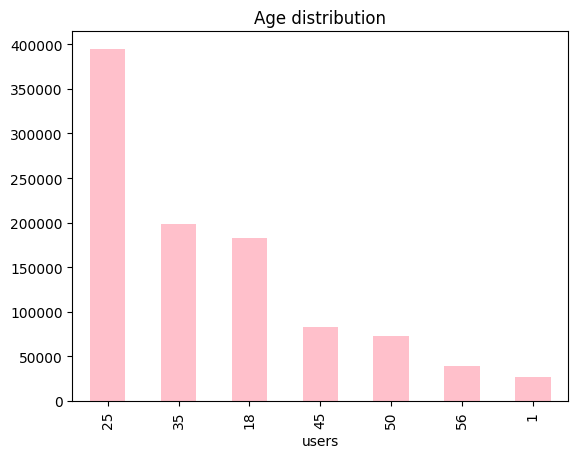

In [16]:
# exploring the users age distribution
movie_ratings['Age'].value_counts().plot(color = 'pink', kind = 'bar', title='Age distribution', xlabel='users')
plt.show()

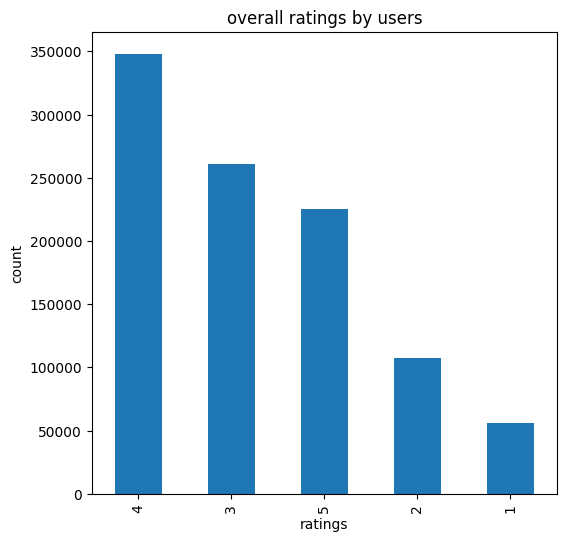

In [17]:
# Overall ratings by users
movie_ratings['Ratings'].value_counts().plot(kind='bar',figsize=(6,6), title= 'overall ratings by users', ylabel='count', xlabel='ratings' )
plt.show()


In [18]:
# using group by to get the unique values of the data
users = movie_ratings.groupby('UserID')
ratings = movie_ratings.groupby('Ratings')
movies = movie_ratings.groupby('MovieName')
movies.first()


,MovieID,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
MovieName,,,,,,,,,
"$1,0,000 Duck (1971)",2031,Children's|Comedy,216,2,976867230,M,45,13,52761
'Night Mother (1986),3112,"Drama,,",68,5,977883710,M,18,4,53706
'Til There Was You (1997),779,"Drama|Romance,,",38,2,978045250,F,18,4,02215
"'burbs, The (1989)",2072,"Comedy,",10,4,978230923,F,35,1,95370
...And Justice for All (1979),3420,"Drama|Thriller,,",23,2,978465796,M,35,0,90049
...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",3223,"Drama,",655,2,975698249,F,25,2,92629
Zero Effect (1998),1845,"Comedy|Thriller,,",23,3,978465462,M,35,0,90049
Zero Kelvin (Kjærlighetens kjøtere) (1995),1364,"Action,,",1352,3,1031532546,M,35,20,94122


In [19]:
# getting info about toy story
toy_story2= movies.get_group('Toy Story 2 (1999)')
toy_story2

,MovieID,MovieName,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
834568,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",3,3,978298103,M,25,15,55117
834569,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",9,4,978225952,M,25,17,61614
834570,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",10,4,978225759,F,35,1,95370
834571,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",17,5,978159386,M,50,1,95350
834572,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",19,4,978147462,M,1,10,48073
...,...,...,...,...,...,...,...,...,...,...
836147,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",6022,5,956755741,M,25,17,57006
836148,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",6024,4,956749447,M,25,12,53705
836149,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",6027,4,956726766,M,18,4,20742
836150,3114,Toy Story 2 (1999),"Animation|Children's|Comedy,,",6036,4,956710231,F,25,15,32603


<Axes: xlabel='Movie Name', ylabel='Ratings'>

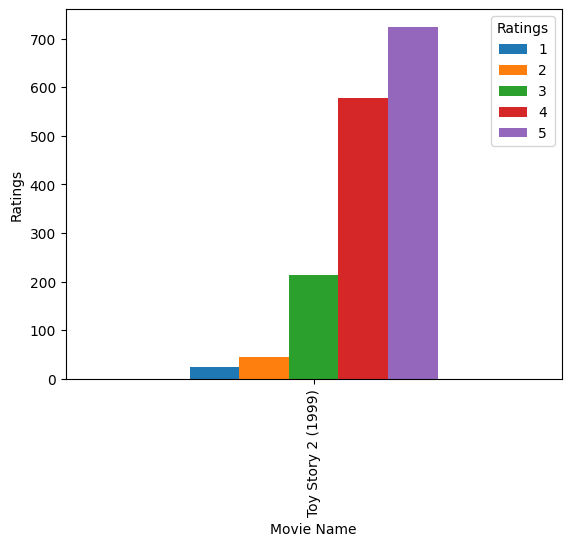

In [20]:
# toy story movie ratings
toystoryRatings = movie_ratings[movie_ratings['MovieName'].str.contains('Toy Story')==True]
toystoryRatings.groupby(['MovieName','Ratings']).size().unstack().plot(kind='bar', stacked=False, xlabel= 'Movie Name', ylabel = 'Ratings')

<Axes: xlabel='Movie Name', ylabel='Ratings'>

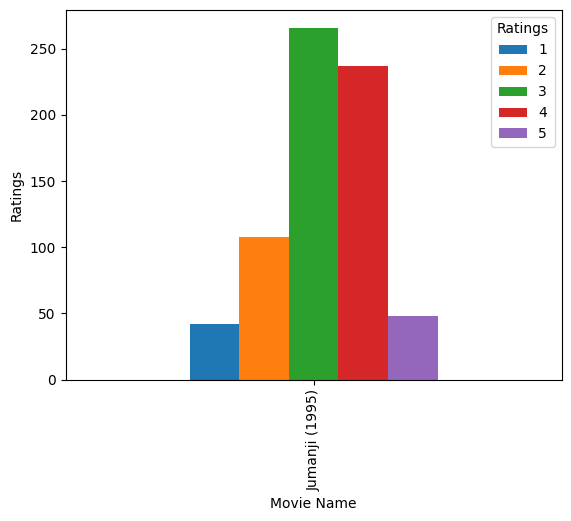

In [21]:
# Jumanji movie ratings
JJRatings = movie_ratings[movie_ratings['MovieName'].str.contains('Jumanji')==True]
JJRatings.groupby(['MovieName','Ratings']).size().unstack().plot(kind='bar', stacked=False, xlabel= 'Movie Name', ylabel = 'Ratings')


In [22]:
# creating a new categorial variable age group from existing numerical variable age using pd.cut funtion
labels = ['1-10','10-20','20-30','30-40','40-50','50-60','60-70']
movie_ratings['age_group']= pd.cut(movie_ratings.Age, range(0,81,11), right=False, labels = labels)
movie_ratings[['Age','age_group']].drop_duplicates()


,Age,age_group
0,35,30-40
1,45,40-50
2,18,10-20
4,25,20-30
9,50,40-50
11,1,1-10
38,56,50-60


In [23]:
movie_ratings['age_group']

0         30-40
1         40-50
2         10-20
3         30-40
4         20-30
          ...  
998075    20-30
998076    20-30
998077    20-30
998078    30-40
998079    10-20
Name: age_group, Length: 998080, dtype: category
Categories (7, object): ['1-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70']

<Axes: ylabel='MovieName'>

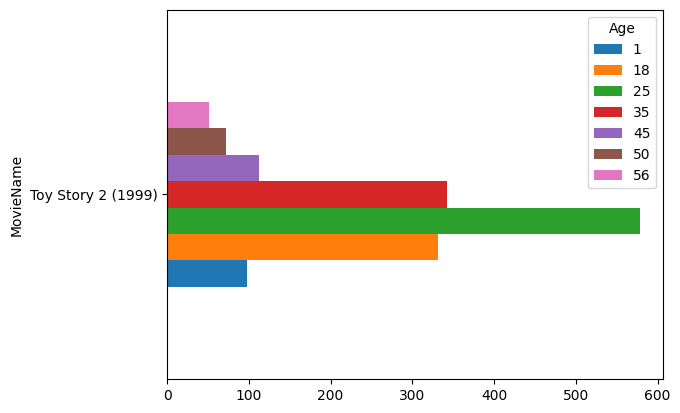

In [24]:
# we can visualize the age group that views toy story and jumanji
toystoryRatings.groupby(['MovieName','Age']).size().unstack().plot(kind='barh')

<Axes: ylabel='MovieName'>

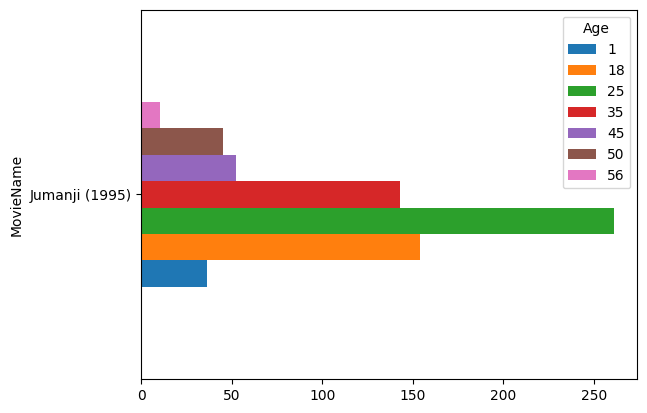

In [25]:
JJRatings.groupby(['MovieName','Age']).size().unstack().plot(kind='barh')

In [26]:
movies = movie_ratings.groupby('MovieName')

In [27]:
movies.first()

,MovieID,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code,age_group
MovieName,,,,,,,,,,
"$1,0,000 Duck (1971)",2031,Children's|Comedy,216,2,976867230,M,45,13,52761,40-50
'Night Mother (1986),3112,"Drama,,",68,5,977883710,M,18,4,53706,10-20
'Til There Was You (1997),779,"Drama|Romance,,",38,2,978045250,F,18,4,02215,10-20
"'burbs, The (1989)",2072,"Comedy,",10,4,978230923,F,35,1,95370,30-40
...And Justice for All (1979),3420,"Drama|Thriller,,",23,2,978465796,M,35,0,90049,30-40
...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",3223,"Drama,",655,2,975698249,F,25,2,92629,20-30
Zero Effect (1998),1845,"Comedy|Thriller,,",23,3,978465462,M,35,0,90049,30-40
Zero Kelvin (Kjærlighetens kjøtere) (1995),1364,"Action,,",1352,3,1031532546,M,35,20,94122,30-40


In [28]:
# finding movie with rtaings more than three
rat =  movie_ratings[movie_ratings['Ratings']>3]
r = rat.groupby('MovieName')
r.first()

,MovieID,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code,age_group
MovieName,,,,,,,,,,
"$1,0,000 Duck (1971)",2031,Children's|Comedy,494,5,976215651,F,35,0,17870,30-40
'Night Mother (1986),3112,"Drama,,",68,5,977883710,M,18,4,53706,10-20
'Til There Was You (1997),779,"Drama|Romance,,",156,4,977250462,F,45,7,14519,40-50
"'burbs, The (1989)",2072,"Comedy,",10,4,978230923,F,35,1,95370,30-40
...And Justice for All (1979),3420,"Drama|Thriller,,",146,5,979854434,F,35,20,10954,30-40
...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",3223,"Drama,",850,5,975351151,M,35,0,60640,30-40
Zero Effect (1998),1845,"Comedy|Thriller,,",53,5,977973989,M,25,0,96931,20-30
Zero Kelvin (Kjærlighetens kjøtere) (1995),1364,"Action,,",4277,4,1000961159,M,35,16,98133,30-40


In [29]:
# finding out all the genres
dfGenres = movie_ratings['Genre'].str.split('|')
dfGenres

0         [Adventure, Children's, Fantasy,,]
1         [Adventure, Children's, Fantasy,,]
2         [Adventure, Children's, Fantasy,,]
3         [Adventure, Children's, Fantasy,,]
4         [Adventure, Children's, Fantasy,,]
                         ...                
998075                    [Drama, Thriller,]
998076                    [Drama, Thriller,]
998077                    [Drama, Thriller,]
998078                    [Drama, Thriller,]
998079                    [Drama, Thriller,]
Name: Genre, Length: 998080, dtype: object

In [30]:
listgenre = set()
for genre in dfGenres:
  listgenre = listgenre.union(set(genre))


In [31]:
listgenre

{'Action',
 'Action,',
 'Action,,',
 'Adventure',
 'Adventure,',
 'Adventure,,',
 'Animation',
 'Animation,',
 'Animation,,',
 "Children's",
 "Children's,",
 "Children's,,",
 'Comedy',
 'Comedy,',
 'Comedy,,',
 'Crime',
 'Crime,',
 'Crime,,',
 'Documentary',
 'Documentary,',
 'Documentary,,',
 'Drama',
 'Drama,',
 'Drama,,',
 'Fantasy',
 'Fantasy,',
 'Fantasy,,',
 'Film-Noir',
 'Film-Noir,',
 'Film-Noir,,',
 'Horror',
 'Horror,',
 'Horror,,',
 'Musical',
 'Musical,',
 'Musical,,',
 'Mystery',
 'Mystery,',
 'Mystery,,',
 'Romance',
 'Romance,',
 'Romance,,',
 'Sci-Fi',
 'Sci-Fi,',
 'Sci-Fi,,',
 'Thriller',
 'Thriller,',
 'Thriller,,',
 'War',
 'War,',
 'War,,',
 'Western',
 'Western,',
 'Western,,'}

In [32]:
# Creating a separate for each type of genre with one hot encoding(0 or 1), whether or not the movie belongs to that category
ratings01=movie_ratings['Genre'].str.get_dummies('|')
ratings01= ratings01.drop_duplicates()
ratings01.head()

,Action,"Action,","Action,,",Adventure,"Adventure,","Adventure,,",Animation,"Animation,","Animation,,",Children's,...,"Sci-Fi,,",Thriller,"Thriller,","Thriller,,",War,"War,","War,,",Western,"Western,","Western,,"
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1645,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


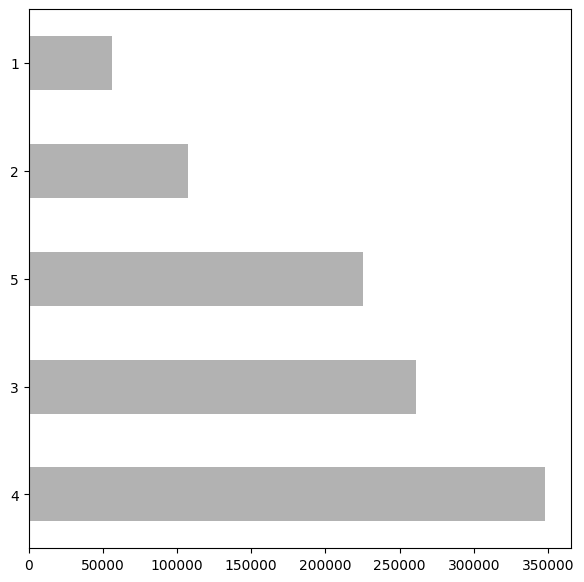

In [33]:
#Find and visualize the top 25 movies by viewership rating
top_25 = movie_ratings[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7),color='grey')
plt.show()

In [34]:
#finding factors/features that affect the rating of a movie
movie_ratings.groupby('Gender').size().sort_values(ascending=False)

Gender
M    752283
F    245797
dtype: int64

<Axes: xlabel='Age'>

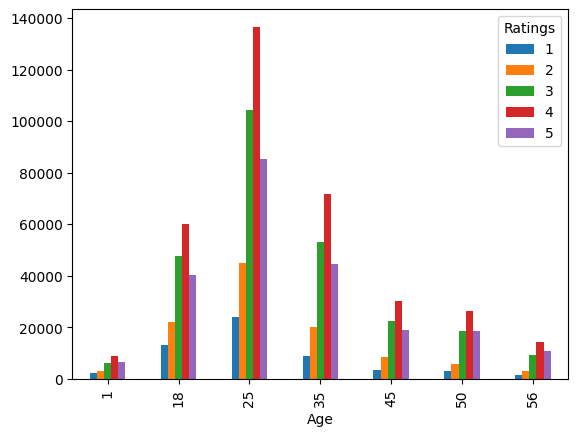

In [35]:
movie_ratings.groupby(['Age','Ratings']).size().unstack().plot(kind='bar', stacked=False)

<Axes: xlabel='Gender'>

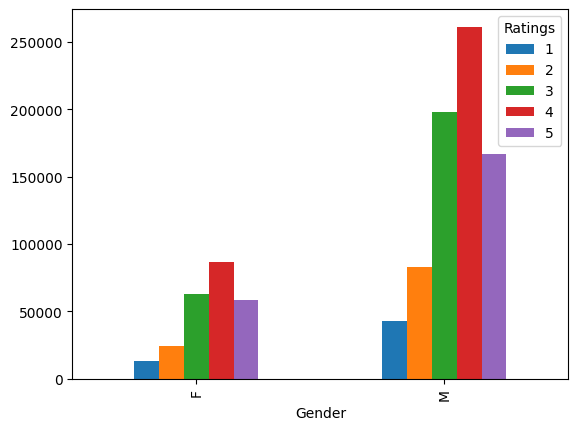

In [36]:
movie_ratings.groupby(['Gender','Ratings']).size().unstack().plot(kind='bar', stacked=False)

<Axes: xlabel='Occupation'>

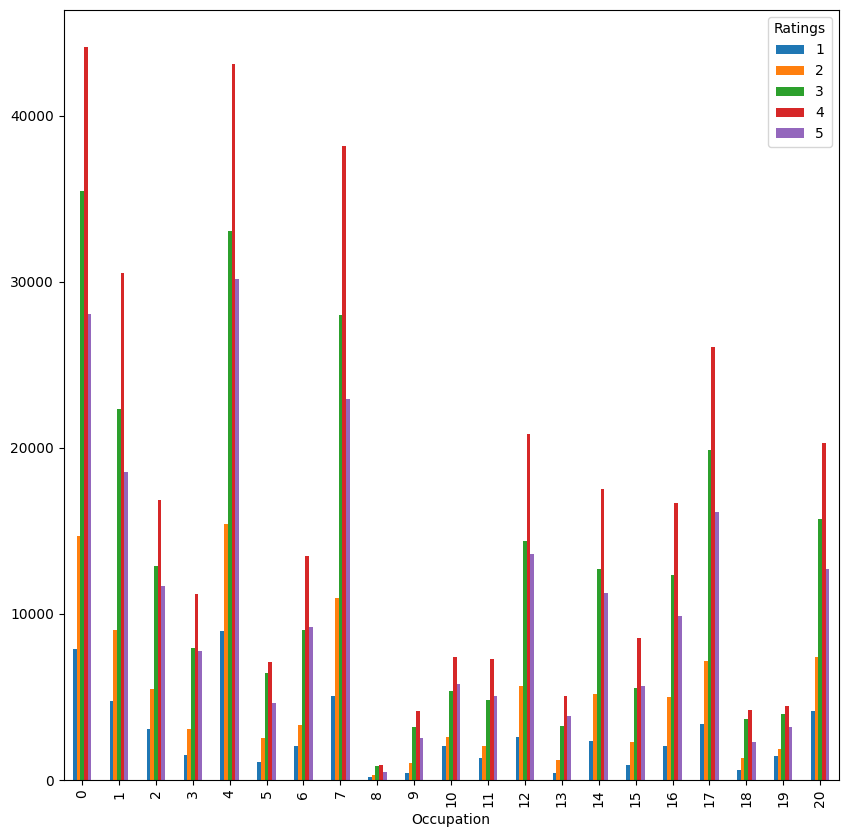

In [37]:
movie_ratings.groupby(['Occupation','Ratings']).size().unstack().plot(kind='bar', stacked=False, figsize=(10,10))

# Model development and training

In [38]:
#separating the feature and target variable
features = movie_ratings[['MovieID','Age','Occupation']].values
labels= movie_ratings['Ratings'].values

In [39]:
# import necessary dependencies for training and modeling of your data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [40]:
# splitting the dataset into trining and testing data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

In [41]:
# Model 1
lr = LogisticRegression()
lr.fit(train,train_labels)
y_predict= lr.predict(test)
acc_model1 = accuracy_score(test_labels, y_predict)
score1 = round(lr.score(train, train_labels)*100,2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
Classification_Report = classification_report(test_labels, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print('accuracy score of Logistic Regression model is :', acc_model1)
print('score of Logistic Regression model is :', score1)
print('classification report of Logistic Regression model is :', Classification_Report)


accuracy score of Logistic Regression model is : 0.3488431121085818
score of Logistic Regression model is : 34.84
classification report of Logistic Regression model is :               precision    recall  f1-score   support

           1       0.00      0.00      0.00     16922
           2       0.00      0.00      0.00     32050
           3       0.25      0.00      0.00     78313
           4       0.35      1.00      0.52    104534
           5       0.00      0.00      0.00     67605

    accuracy                           0.35    299424
   macro avg       0.12      0.20      0.10    299424
weighted avg       0.19      0.35      0.18    299424



In [44]:
# Model 2
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train,train_labels)
y_pred_rf= rf.predict(test)
acc_model2 = accuracy_score(test_labels, y_pred_rf)
score2 = round(rf.score(train, train_labels)*100,2)

In [45]:
Classification_Report = classification_report(test_labels, y_pred_rf)

In [46]:
print('accuracy score of Random Forest model is :', acc_model2)
print('score of  Random Forest model is :', score2)
print('classification report of Random Forest model is :', Classification_Report)


accuracy score of Random Forest model is : 0.35287418510206264
score of  Random Forest model is : 56.21
classification report of Random Forest model is :               precision    recall  f1-score   support

           1       0.24      0.15      0.19     16922
           2       0.20      0.13      0.16     32050
           3       0.32      0.30      0.31     78313
           4       0.39      0.47      0.42    104534
           5       0.39      0.39      0.39     67605

    accuracy                           0.35    299424
   macro avg       0.31      0.29      0.29    299424
weighted avg       0.34      0.35      0.34    299424



In [47]:
# Model 3
knn = KNeighborsClassifier()
knn.fit(train,train_labels)
y_pred_knn= knn.predict(test)
acc_model3 = accuracy_score(test_labels, y_pred_knn)
score3 = round(knn.score(train, train_labels)*100,2)

In [48]:
Classification_Report = classification_report(test_labels, y_pred_knn)

In [49]:
print('accuracy score of KNN model is :', acc_model3)
print('score of  KNN model is :', score3)
print('classification report of KNN model is :', Classification_Report)


accuracy score of KNN model is : 0.33343686544832746
score of  KNN model is : 46.43
classification report of KNN model is :               precision    recall  f1-score   support

           1       0.21      0.19      0.20     16922
           2       0.19      0.16      0.17     32050
           3       0.30      0.36      0.33     78313
           4       0.38      0.42      0.40    104534
           5       0.39      0.29      0.33     67605

    accuracy                           0.33    299424
   macro avg       0.30      0.28      0.29    299424
weighted avg       0.33      0.33      0.33    299424



In [50]:
models = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','K-Nearest Neighbor'],'Score':[score1, score2, score3]})

In [51]:
models.sort_values(ascending=False, by='Score')

,Model,Score
1,Random Forest Classifier,56.21
2,K-Nearest Neighbor,46.43
0,Logistic Regression,34.84


# As we saw that all our models worked perfectly and the most appropriatte model is model 2nd - Random Forest Classifier model

In [52]:
# let'spredict some values now
print(train)

[[1172   45    0]
 [3945   25    4]
 [ 158   45    3]
 ...
 [1950   25    7]
 [3646   25   12]
 [ 293   45    0]]


In [53]:
print(labels)

[5 3 2 ... 4 1 4]


In [54]:
rf.predict([[1150, 45, 1]])

array([4])